In [1]:
import os, json, csv
import networkx as nx

In [2]:
file_names = os.listdir('mibig_json_2.0')
res_dict = {}

Создаем словарь со SMILE структурами. Если у одного BGC несколько структур, то i-ая структура будет записана через .i

In [3]:
for file_name in file_names:
    with open('mibig_json_2.0/'+file_name, 'r') as read_file:
        data = json.load(read_file)
        if len(data['cluster']['compounds']) == 1:
            compound = data['cluster']['compounds'][0]
            if 'chem_struct' in compound:
                res_dict[file_name[:-5]] = (compound['chem_struct'])
        else: 
            i = 1
            for compound in data['cluster']['compounds']:
                if 'chem_struct' in compound:
                    res_dict[file_name[:-5]+f'.{i}'] = (compound['chem_struct'])
                    i+=1

Переписываем словарь в файл tsv для нерпы, первый столбец - BGC ID, второй - SMILE

In [4]:
with open('data_structures.tsv', 'wt') as out_file:
    tsv_writer = csv.writer(out_file, delimiter='\t')
    tsv_writer.writerow(['ID', 'SMILES'])
    for key in res_dict.keys():
        tsv_writer.writerow([key, res_dict[key]])

In [5]:
file_names = os.listdir('mibig_json_2.0')

In [6]:
with open('structures.info', 'r') as read_file:
    arr = []
    for s in read_file:
        arr.append(s)

In [7]:
print(arr[20])

BGC0001189_variant0 @L-OH-Asp,@D-aThr/Thr,@L-Asp,@D-OH-Orn,@L-Ser,OH-cOrn;0,1;1,2;2,3;3,4;4,5 7,2,1,5,4,3;1,2;3,4;4,5;5,1;5,6;7,8;2,7



In [8]:
def edit(s):
    s = s.split()
    comp_id = s[0].split('_')[0]
    s0 = s[1].split(';')
    acids = s0[0].split(',')
    d = {i: acid for i, acid in enumerate(acids)}
    edges = s0[1:]# + s[2].split(';')[1:]
    s2 = s[2].split(';')[1:]
    return d, edges, comp_id

In [9]:
def draw_graph(s):
    d, edges, name = edit(s)
    graph =nx.Graph()
    for acid in d.values():
        graph.add_node(acid)
    for edge in edges:
        e = list(map(int, edge.split(',')))
        graph.add_edge(d[e[0]], d[e[1]])
    print(name)
    nx.draw_circular(graph,
         node_color='red',
         node_size=1000,
         with_labels=True)

BGC0000335.1


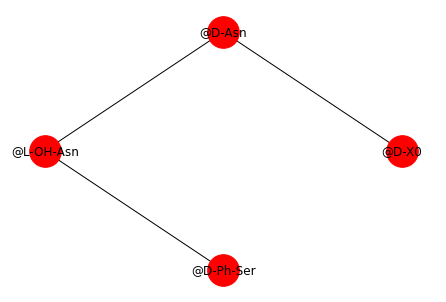

In [10]:
draw_graph(arr[40])

Строка для запуска нерпы

In [ ]:
nerpa.py -a test_data/MIBiG_subset/genome_predictions --smiles-tsv <tsv> col-id ID

In [11]:
with open('rban.output.json', 'r') as read_file:
        data = json.load(read_file)

In [12]:
for i in data:
    i = i['monomericGraph']['monomericGraph']

In [13]:
data[0]['monomericGraph']['monomericGraph']['bonds'][1]['bond']['monomers']

[3, 4]

In [14]:
def proceed_compound(comp):
    name = comp['id']
    comp = comp['monomericGraph']['monomericGraph']
    monomers = comp['monomers']
    bonds = comp['bonds']
    nodes = []
    edges = []
    s = ''
    for monomer in monomers:
        nodes.append(sorted(monomer['monomer']['monomer']['codes'], key=len)[0])
        s += sorted(monomer['monomer']['monomer']['codes'], key=len)[0] + ','
    s = s[:-1]
    for bond in bonds:
        edges.append(bond['bond']['monomers'])
        s += ';' + str(bond['bond']['monomers'][0]) + ',' + str(bond['bond']['monomers'][1]) 
    return name, s #, nodes, edges

In [15]:
with open('data_graphs.tsv', 'wt') as out_file:
    tsv_writer = csv.writer(out_file, delimiter='\t')
    tsv_writer.writerow(['ID', 'GRAPH'])
    for i in data:
        (name, s) = proceed_compound(i)
        tsv_writer.writerow([name, s])

In [16]:
proceed_compound(data[0])[1]

'Asp,OH-Asp,Val,Dbu,bMe-Asp,X0,bMe-Asp,Gly,4Me-Pro,Val,Lys;1,2;3,4;5,6;4,5;7,8;8,1;9,10;10,7;2,11;11,3;4,9'

In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
uni = np.array([])
with open('data_graphs.tsv', 'r') as rf:
    reader = csv.reader(rf, delimiter='\t')
    for row in reader:
        acids = row[1].split(';')[0].split(',')
        uni = np.append(uni, np.array(acids))

In [55]:
vals = np.unique(uni, return_counts=True)[0]
counts = np.unique(uni, return_counts=True)[1]

idx = np.flip(np.argsort(counts))
for i in idx:
    print(vals[i], counts[i])

X0 1788
X1 863
X2 355
Ala 311
Gly 273
Leu 267
Val 265
Thr 218
Ser 197
Glc 191
Ile 188
Cys 144
X3 136
Asn 121
Pro 120
dhCys 119
Asp 93
Gln 90
Phe 86
dhAbu 75
Lys 75
dh-Ala 64
Trp 63
Glu 60
Arg 59
Oli 57
Abu 55
Tyr 54
Hpg 51
X4 49
NMe-Val 42
His 36
diOH-Bz 35
NMe-Thr 32
NMe-Leu 31
Dab 31
NMe-Gly 29
Lac 25
Hiv 24
OH-Asp 24
NMe-Phe 23
Rha 21
Suc 20
bMe-Phe 20
bMe-Asp 20
Dhpg 20
Bz 19
OH-Asn 19
t-Leu 19
C14:0-OH(3) 19
Orn 17
X5 16
Dht 16
Sal 15
NMe-Cys 15
Dbu 15
D-N2Me-Asn 14
Fo-OH-Orn 14
C10:0-OH(3) 13
Met 13
Ph-Ser 12
OH-cOrn 12
bAla 12
bOH-Cl-Tyr 12
3OH-Leu 12
Adda 11
bOH-Val 11
NMe-Hpr 10
bLys 10
4Me-Pro 9
C12:0 9
Dpr 9
aFo-Gly 9
NMe-Dha 9
OH-Orn 9
Hpr 9
C6:0-Ep(2) 8
NMe-Ser 8
bOH-Tyr 8
C4:0-Me(2) 8
X7 8
NFo-Ala 8
C4:0-OH(3) 8
Piz 8
C14:0 8
Ac-OH-Orn 7
Aib 7
4OH-Pro 7
NFo-Met 7
C4:0 7
X6 7
NFo-Val 7
Aco 7
Hse 7
4Me-Hva 7
Hty 6
COOH-Qui 6
bPhe 6
NMe-Ile 6
NFo-Hpr 6
NMe-Ala 6
C8:0-OH(3) 6
Put 6
Ara 6
Pya 6
C6:0 5
Cap 5
3Me-Glu 5
diMe-Cys 5
Ere 5
NFo-Lys 5
C8:0 5
Ph-Lac 5
Pda 5
X8 5
C12:0-

In [65]:
'Gln' in acids

True

In [63]:
acids = ['Gly', 'Leu', 'Tyr', 'Ser', 'Glu', 'Gln', 'Asp', 'Asn',
         'Phe', 'Ala', 'Lys', 'Arg', 'His', 'Cys', 'Val', 'Pro',
         'Hyp', 'Trp', 'Ile', 'Met', 'Thr', 'Hyl']

In [71]:
with open('rban_monomers_db.json', 'r') as read_file:
        monomers = json.load(read_file)

In [72]:
monomers[3]

{'id': 4,
 'cid': '13908552',
 'monomer': 'iC16:0-OH(3)',
 'codes': ['iC16:0-OH(3)'],
 'names': ['3-hydroxy-14-methyl-pentadecanoic acid'],
 'smiles': 'CC(C)CCCCCCCCCCC(O)CC(O)=O',
 'mwHeavyAtoms': 239.98474386,
 'isNew': False,
 'isIdentified': True,
 'compounds': None,
 'compoundsCount': 0}

In [79]:
for mon in monomers:
    if 'dh-Ala' in mon['codes']:
        print(mon)

{'id': 371, 'cid': '123991', 'monomer': 'dh-Ala', 'codes': ['dh-Ala'], 'names': ['dehydroalanine'], 'smiles': 'C=C(N)C(=O)O', 'mwHeavyAtoms': 81.99290324, 'isNew': False, 'isIdentified': True, 'compounds': None, 'compoundsCount': 0}


In [91]:
graphs = []
with open('data_graphs.tsv', 'r') as rf:
    reader = csv.reader(rf, delimiter='\t')
    for row in reader:
        graphs.append(row)

In [ ]:
graphs

In [88]:
monomers = {}
with open('monomers.tsv', 'r') as rf:
    reader = csv.reader(rf, delimiter='\t')
    for row in reader:
        monomers[row[0]] = row[1].capitalize()

In [ ]:
monomers

In [110]:
s = proceed_compound(data[0])[1]
s

'Asp,OH-Asp,Val,Dbu,bMe-Asp,X0,bMe-Asp,Gly,4Me-Pro,Val,Lys;1,2;3,4;5,6;4,5;7,8;8,1;9,10;10,7;2,11;11,3;4,9'

In [127]:
def proceed_monomers(s):
    if ';' not in s:
        return s
    arr = s.split(';', maxsplit=1)
    acids = arr[0].split(',')
    for i, acid in enumerate(acids):
        if acid in monomers.keys():
            acids[i] = monomers[acid]
    s = ','.join(acids)
    s = ';'.join([s, arr[1]])
    return s

In [128]:
n =18
proceed_monomers(proceed_compound(data[n])[1])

'X0'

In [126]:
proceed_compound(data[n])

('BGC0001119.3', 'X0')

In [129]:
with open('data_graphs_adj.tsv', 'wt') as out_file:
    tsv_writer = csv.writer(out_file, delimiter='\t')
    tsv_writer.writerow(['ID', 'GRAPH'])
    for i in data:
        (name, s) = proceed_compound(i)
        s = proceed_monomers(s)
        tsv_writer.writerow([name, s])

In [130]:
graphs_1 = []
with open('data_graphs_adj.tsv', 'r') as rf:
    reader = csv.reader(rf, delimiter='\t')
    for row in reader:
        graphs_1.append(row)